# Практическая работа 1. Источники данных. Извлечение данных

ФИО: Соколова Марина Сергеевна

Группа: АДЭУ-201

## Задание 1.1

Используем данные из открытого источника для `CSV`, `Parquet` и `API`, а также вручную подготовим данные для баз данных и HTML  из открытых данных (доступно по адресу https://data.cityofnewyork.us).

In [1]:
# import modules
import certifi
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import urllib3
from urllib3 import request
from unicodedata import normalize

Файлы данных могут быть получены откуда угодно: от файлов, хранящихся локально на вашем устройстве, до файловых систем облачного хранилища.

Даже при работе в основном с базами данных или внешними `API` использование физических файлов — отличный способ легко использовать данные с метками времени, что может пригодиться при любых временных проблемах с подключением.

In [2]:
# Загрузите данные с портала открытых данных Правительства Москвы —
# данные о Wi-Fi в кинотеатрах, введя в браузер следующий URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false.
# Будет загружен CSV-файл *.csv. Сохраните этот файл.
# прочитать данные CSV, используя команду Pandas pd.read_csv() в качестве df DataFrame, затем выберите первые пять строк DataFrame с помощью df.head().

**Задание 1.1.** Зайти на сайт URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false

**Задание 1.2.** Загрузить данные о `Wi-Fi в кинотеатрах`.

**Задание 1.3.** Считайте данные из файла CSV. Использовать метод `pandas read_csv` для простоты и скорости.

In [3]:
df_csv = pd.read_csv(r"C:\Users\marin\Downloads\data-60789-2024-01-24.csv", delimiter=';')
df_csv.head()

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
0,global_id,Код,Наименование кинотеатра,Административный округ,Район,Адрес,Количество точек доступа,Имя Wi-Fi сети,"Зона покрытия, в метрах",Признак функционирования,Условия доступа,Пароль,Широта в WGS-84,Долгота в WGS-84,geoData,geodata_center,NaN
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN
3,879791953,4,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Текстильщики,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.710864,37.731299,"{coordinates=[37.731299, 55.710864], type=Point}",NaN,NaN
4,879791961,7,Государственное бюджетное учреждение культуры ...,Северный административный округ,Тимирязевский район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.814406,37.571210,"{coordinates=[37.57121, 55.814406], type=Point}",NaN,NaN


**Задание 1.4.** Так как первая строка включает определение столбцов, удалить строку с `index=0`.

In [4]:
data = df_csv.drop(df_csv.index[0])

In [5]:
data.head(2)

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN


In [6]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   global_id             12 non-null     object 
 1   ID                    12 non-null     object 
 2   CinemaName            12 non-null     object 
 3   AdmArea               12 non-null     object 
 4   District              12 non-null     object 
 5   Address               12 non-null     object 
 6   NumberOfAccessPoints  12 non-null     object 
 7   WiFiName              12 non-null     object 
 8   CoverageArea          12 non-null     object 
 9   FunctionFlag          12 non-null     object 
 10  AccessFlag            12 non-null     object 
 11  Password              1 non-null      object 
 12  Latitude_WGS84        12 non-null     object 
 13  Longitude_WGS84       12 non-null     object 
 14  geoData               12 non-null     object 
 15  geodata_center        1 n

In [7]:
data.pivot_table(index='AdmArea', values='ID', aggfunc='count').sort_values(by='ID', ascending=False)

,ID
AdmArea,
Юго-Восточный административный округ,4
Северо-Восточный административный округ,3
Юго-Западный административный округ,2
Восточный административный округ,1
Северный административный округ,1


<Axes: xlabel='AdmArea'>

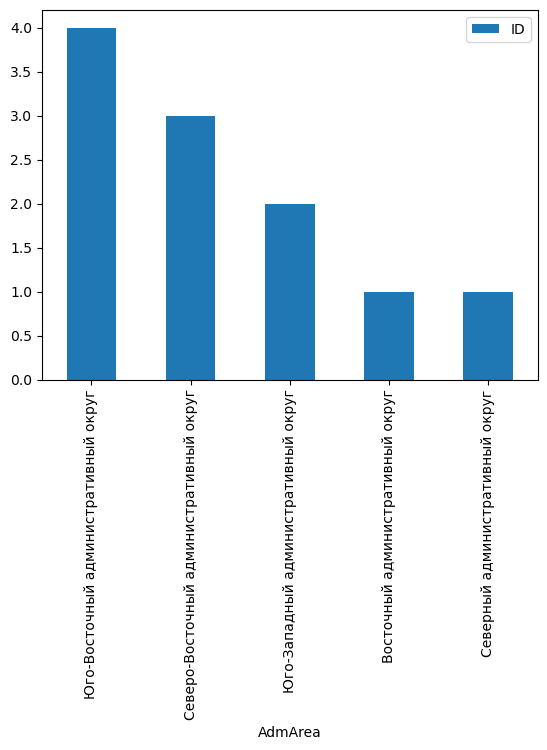

In [8]:
data.pivot_table(index='AdmArea', values='ID', aggfunc='count').sort_values(by='ID', ascending=False).plot(kind='bar')

**Задание 1.5.** Выполнить парсинг веб-страницы с помощью `JSON`

In [9]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint

# Для выполнения операций с регулярными выражениями
import re

In [10]:
resp = reqs.request(method='GET', url='https://apidata.mos.ru/v1/datasets/60789/features?api_key=9c9e90a8-59a7-4b5b-8da3-e9add478332e')

**Задание 1.6.** Выполнить парсинг веб-страницы с помощью `JSON`. Получите URL-адрес:

In [11]:
print(f"URL: \n\t {resp.url}")

URL: 
	 https://apidata.mos.ru/v1/datasets/60789/features?api_key=9c9e90a8-59a7-4b5b-8da3-e9add478332e


**Задание 1.7.** Выполнить парсинг веб-страницы с помощью `JSON`. Определите тип контента:

In [12]:
print(f"Content type: \n\t {resp.headers['content-type']}")

Content type: 
	 application/json


**Задание 1.8.** Выполнить парсинг веб-страницы с помощью `JSON`. Обработайте данные с помощью JSON:

In [13]:
if resp.status_code == 200:
   json_page = json.loads(resp.text)

**Задание 1.9.**  Обработайте данные с помощью `JSON`. Посмотреть на ключи:

In [14]:
for x in json_page:
    print(x)

features
type


Распечатать ключи и значения:

In [15]:
for x in json_page:
    print(f"{x} --> {json_page[x]} \n")

features --> [{'geometry': {'coordinates': [37.636778, 55.818675], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 1, 'CinemaName': 'Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»', 'AdmArea': 'Северо-Восточный административный округ', 'District': 'Останкинский район', 'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109', 'NumberOfAccessPoints': 7, 'WiFiName': 'Moscow_WiFi_Free', 'CoverageArea': 50, 'FunctionFlag': 'действует', 'AccessFlag': 'открытая сеть', 'Password': '', 'Latitude_WGS84': '55.818675', 'Longitude_WGS84': '37.636778', 'global_id': 879791944}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 32}, 'type': 'Feature'}, {'geometry': {'coordinates': [37.718534, 55.685873], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 3, 'CinemaName': 'Государственн

In [16]:
pprint.pprint(json_page)

{'features': [{'geometry': {'coordinates': [37.636778, 55.818675],
                            'type': 'Point'},
               'properties': {'attributes': {'AccessFlag': 'открытая сеть',
                                             'Address': 'Российская Федерация, '
                                                        'город Москва, '
                                                        'внутригородская '
                                                        'территория '
                                                        'муниципальный округ '
                                                        'Останкинский, '
                                                        'проспект Мира, дом '
                                                        '109',
                                             'AdmArea': 'Северо-Восточный '
                                                        'административный '
                                                        'округ',
  

**Задание 1.10.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`

In [17]:
from bs4 import BeautifulSoup as bso

In [18]:
# Отправление запроса на получение данных и присваивание ответ переменной.
source = reqs.get("https://apidata.mos.ru/v1/datasets/60789/features?api_key=9c9e90a8-59a7-4b5b-8da3-e9add478332e")

In [19]:
print(f"Content type: \n\t {source.headers['content-type']}")

Content type: 
	 application/json


In [20]:
print(source)

<Response [200]>


**Задание 1.10.1.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Создать beautiful soup объект.

In [21]:
mysoup = bso(source.text, 'html.parser')

**Задание 1.10.2.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Распечатайте HTML-содержимое страницы, используя метод prettify

In [22]:
print(mysoup.prettify())

{"features":[{"geometry":{"coordinates":[37.636778,55.818675],"type":"Point"},"properties":{"datasetId":60789,"attributes":{"is_deleted":0,"ID":1,"CinemaName":"Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»","AdmArea":"Северо-Восточный административный округ","District":"Останкинский район","Address":"Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109","NumberOfAccessPoints":7,"WiFiName":"Moscow_WiFi_Free","CoverageArea":50,"FunctionFlag":"действует","AccessFlag":"открытая сеть","Password":"","Latitude_WGS84":"55.818675","Longitude_WGS84":"37.636778","global_id":879791944},"rowId":null,"versionNumber":1,"releaseNumber":32},"type":"Feature"},{"geometry":{"coordinates":[37.718534,55.685873],"type":"Point"},"properties":{"datasetId":60789,"attributes":{"is_deleted":0,"ID":3,"CinemaName":"Государственное бюджетное учреждение культуры города Москвы «Московское кино»

**Задание 1.10.3.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Получить заголовок страницы

In [23]:
print(mysoup.title)

None


**Получение данных из таблиц РСУБД**

**Задание 1.11.** Считать результаты запроса sqlite в DataFrame pandas

In [24]:
# Считываем результаты запроса sqlite в DataFrame pandas
with sqlite3.connect(r"C:\Users\marin\Downloads\movies.sqlite") as conn:
    df = pd.read_sql("SELECT * from movies", conn)
df.head()

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


**Получение данных `Parquet`**

Посетите URL https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page.

**Задание 1.12.** Считайте данные из файла Parquet. Использовать метод pandas read_parquet.

In [25]:
df_parquet = pd.read_parquet(r"C:\Users\marin\Downloads\yellow_tripdata_2023-03.parquet")
df_parquet.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


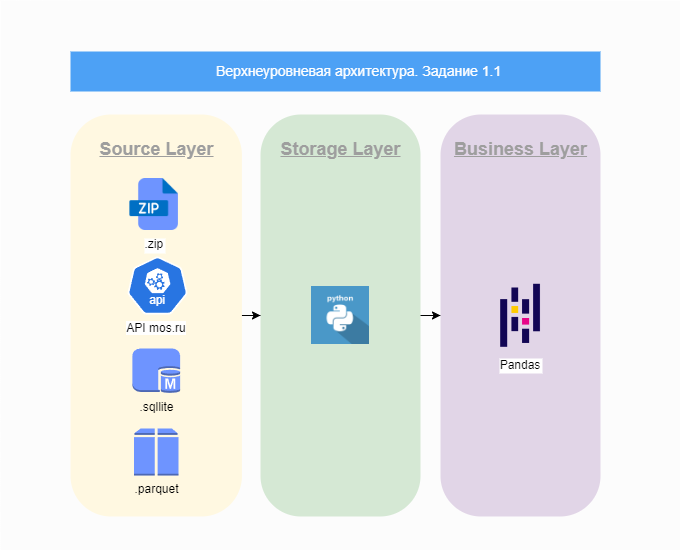

In [26]:
from IPython.display import Image
Image(filename=r'C:\Users\marin\Downloads\Задание 1.1.drawio.png')

## Задание 1.2.  Выполнить парсинг веб-страниц с помощью Beautiful Soup и Pandas открытых источников данных

[Источник данных - ИНОСТРАННЫЕ ЦЕННЫЕ БУМАГИ](https://spbexchange.ru/stocks/inostrannye/instruments/?page%3D0%26size%3D2200%26sortBy%3DsecurityKind%26sortByDirection%3Ddesc)

### Парсинг

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
url = 'https://spbexchange.ru/stocks/inostrannye/instruments/?page%3D0%26size%3D2200%26sortBy%3DsecurityKind%26sortByDirection%3Ddesc'

In [29]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [30]:
print(response)

<Response [200]>


In [31]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 text/html; charset=utf-8


In [32]:
mysoup = bso(response.text, 'html.parser')

In [33]:
print(mysoup.prettify()[:1000])

<!DOCTYPE html>
<html lang="ru">
 <head>
  <meta charset="utf-8"/>
  <title>
   ПАО СПБ Биржа
  </title>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="3" name="next-head-count"/>
  <meta content="#01b3e2" name="theme-color"/>
  <link as="style" href="/_next/static/css/3bce9de98a8ee61c.css" rel="preload"/>
  <link data-n-g="" href="/_next/static/css/3bce9de98a8ee61c.css" rel="stylesheet"/>
  <link as="style" href="/_next/static/css/e730306a193183b9.css" rel="preload"/>
  <link data-n-p="" href="/_next/static/css/e730306a193183b9.css" rel="stylesheet"/>
  <noscript data-n-css="">
  </noscript>
  <script defer="" nomodule="" src="/_next/static/chunks/polyfills-c67a75d1b6f99dc8.js">
  </script>
  <script defer="" src="/_next/static/chunks/webpack-902d5f4585c7c72d.js">
  </script>
  <script defer="" src="/_next/static/chunks/framework-f44ba79936f400b5.js">
  </script>
  <script defer="" src="/_next/static/chunks/main-6a353e1d47c9a3c4.js">
  </scrip

In [34]:
print(mysoup.title)

<title>ПАО СПБ Биржа</title>


In [35]:
table_html = mysoup.table.prettify()
print(table_html[:2000])

<table class="Table_display__TKDq5">
 <thead>
  <tr class="">
   <th class="TableCell_th__mYMx0 TableRow_rowCell__MR4GY" style="min-width:20px">
    №
   </th>
   <th class="TableCell_th__mYMx0 TableRow_rowCell__MR4GY" style="min-width:50px">
    Код ЦБ
   </th>
   <th class="TableCell_th__mYMx0 TableRow_rowCell__MR4GY" style="min-width:120px">
    Наименование эмитента
   </th>
   <th class="TableCell_th__mYMx0 TableRow_rowCell__MR4GY" style="min-width:100px">
    ISIN
   </th>
   <th class="TableCell_th__mYMx0 TableRow_rowCell__MR4GY" style="min-width:30px">
    CFI
   </th>
   <th class="TableCell_th__mYMx0 TableRow_rowCell__MR4GY" style="min-width:30px">
    Лот
   </th>
   <th class="TableCell_th__mYMx0 TableRow_rowCell__MR4GY" style="min-width:40px">
    Шаг цены
   </th>
   <th class="TableCell_th__mYMx0 TableRow_rowCell__MR4GY" style="min-width:50px">
    Валюта цены
   </th>
   <th class="TableCell_th__mYMx0 TableRow_rowCell__MR4GY" style="min-width:40px">
    Дата начала торг

In [36]:
columns = []  # Список для хранения заголовков столбцов
data = []     # Список для хранения данных строк

# Извлекаем заголовки столбцов из тегов <th> в таблице
for th in mysoup.table.find_all('th'):
    columns.append(th.text)  # Добавляем текст из тега <th> в список заголовков

# Извлекаем данные из строк таблицы из тегов <tr> и <td>
for tr in mysoup.table.find_all('tr')[1:]:  # Начинаем с 1, чтобы пропустить первую строку с заголовками
    row = [td.text for td in tr.find_all('td')]  # Создаем список данных для каждой строки таблицы
    data.append(row)  # Добавляем список данных строки в общий список данных

# Создаем DataFrame, используя заголовки столбцов и данные строк
df = pd.DataFrame(data, columns=columns)

# Выводим первые строки DataFrame
df.head()

,№,Код ЦБ,Наименование эмитента,ISIN,CFI,Лот,Шаг цены,Валюта цены,Дата начала торгов,"Вид, категория (тип) ЦБ",Предназначены для квалифицированных инвесторов
0,1,1,CK Hutchison Holdings Limited,KYG217651051,ESVUFR,10,"0,05",Гонконгский доллар,20.06.2022,Акции иностранного эмитента обыкновенные,Нет
1,2,101,Hang Lung Properties Limited,HK0101000591,ESVUFR,100,"0,01",Гонконгский доллар,05.12.2022,Акции иностранного эмитента обыкновенные,Нет
2,3,1024,Kuaishou Technology,KYG532631028,ESVUFR,10,"0,05",Гонконгский доллар,12.10.2022,Акции иностранного эмитента обыкновенные класса B,Нет
3,4,1038,CK Infrastructure Holdings Limited,BMG2178K1009,ESVUFR,10,"0,05",Гонконгский доллар,05.12.2022,Акции иностранного эмитента обыкновенные,Нет
4,5,1044,Hengan International Group Company Limited,KYG4402L1510,ESVUFR,10,"0,05",Гонконгский доллар,05.12.2022,Акции иностранного эмитента обыкновенные,Нет


### Обработка данных

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   №                                               2154 non-null   object
 1   Код ЦБ                                          2154 non-null   object
 2   Наименование эмитента                           2154 non-null   object
 3   ISIN                                            2154 non-null   object
 4   CFI                                             2154 non-null   object
 5   Лот                                             2154 non-null   object
 6   Шаг цены                                        2154 non-null   object
 7   Валюта цены                                     2154 non-null   object
 8   Дата начала торгов                              2154 non-null   object
 9   Вид, категория (тип) ЦБ                         2154

In [38]:
df.shape

(2154, 11)

In [39]:
df['Лот'] = df['Лот'].astype(int)
df['Шаг цены'] = df['Шаг цены'].str.replace(',', '.').astype(float)
df['Дата начала торгов'] = pd.to_datetime(df['Дата начала торгов'])

C:\Users\marin\AppData\Local\Temp\ipykernel_20628\328605208.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Дата начала торгов'] = pd.to_datetime(df['Дата начала торгов'])


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   №                                               2154 non-null   object        
 1   Код ЦБ                                          2154 non-null   object        
 2   Наименование эмитента                           2154 non-null   object        
 3   ISIN                                            2154 non-null   object        
 4   CFI                                             2154 non-null   object        
 5   Лот                                             2154 non-null   int32         
 6   Шаг цены                                        2154 non-null   float64       
 7   Валюта цены                                     2154 non-null   object        
 8   Дата начала торгов                              

**Результат:** изменены типы данных для полей: Лот, Шаг цены, Дата начала торгов

In [41]:
df['Год'] = df['Дата начала торгов'].dt.year

**Результат:** созданы новые столбцы год и месяц для анализа

In [42]:
df = df.drop(columns=df.columns[:2])

**Результат:** Удалены лишние столбцы

### Анализ данных

Описание данных:
1. Наименование эмитента: Название организации, выпускающей ценные бумаги.
2. ISIN: Международный идентификационный номер ценных бумаг, позволяющий однозначно определить ценную бумагу.
3. CFI: Классификационная финансовая информация - код, который содержит информацию о финансовом инструменте.
4. Лот: Минимальное количество ценных бумаг, которое можно купить или продать за одну сделку на бирже.
5. Шаг цены: Минимальное изменение цены ценной бумаги, определяемое правилами торговли на бирже.
6. Валюта цены: Валюта, в которой выражается цена ценной бумаги.
7. Дата начала торгов: Дата начала торговли данными ценными бумагами.
8. Вид, категория (тип) ЦБ: Классификация ценных бумаг по виду или категории.
Предназначены для квалифицированных инвесторов: Информация о том, что данные ценные бумаги предназначены для квалифицированных инвесторов.

In [43]:
df.head(3)

,Наименование эмитента,ISIN,CFI,Лот,Шаг цены,Валюта цены,Дата начала торгов,"Вид, категория (тип) ЦБ",Предназначены для квалифицированных инвесторов,Год
0,CK Hutchison Holdings Limited,KYG217651051,ESVUFR,10,0.05,Гонконгский доллар,2022-06-20,Акции иностранного эмитента обыкновенные,Нет,2022
1,Hang Lung Properties Limited,HK0101000591,ESVUFR,100,0.01,Гонконгский доллар,2022-05-12,Акции иностранного эмитента обыкновенные,Нет,2022
2,Kuaishou Technology,KYG532631028,ESVUFR,10,0.05,Гонконгский доллар,2022-12-10,Акции иностранного эмитента обыкновенные класса B,Нет,2022


In [44]:
print(f'Представлены данные за период с {min(df["Дата начала торгов"])} по {max(df["Дата начала торгов"])}')

Представлены данные за период с 2014-11-28 00:00:00 по 2024-08-01 00:00:00


In [45]:
df1 = df.pivot_table(index='Вид, категория (тип) ЦБ', values='ISIN', aggfunc='count').sort_values(by='ISIN', ascending=False).head(5)
df1

,ISIN
"Вид, категория (тип) ЦБ",
Акции иностранного эмитента обыкновенные,1552
Акции иностранного эмитента обыкновенные класса A,217
Акции иностранного эмитента обыкновенные класса H,73
Облигации иностранного эмитента,24
Акции иностранного эмитента обыкновенные класса B,18


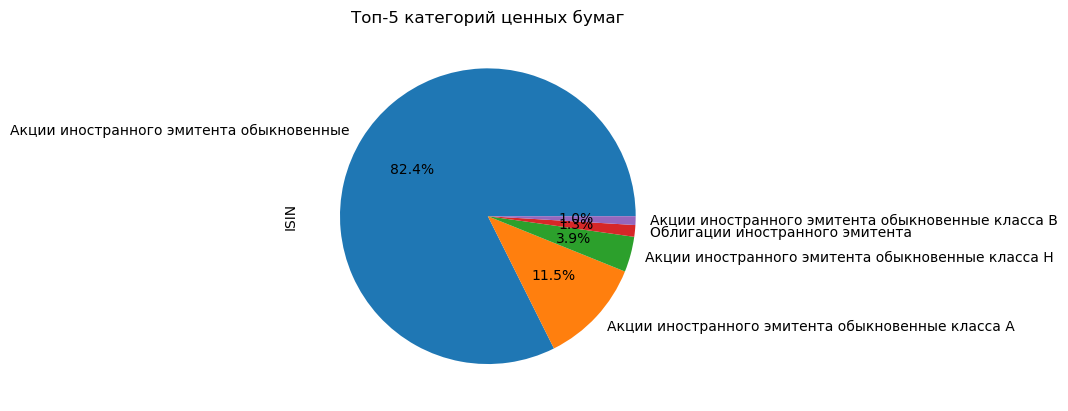

In [46]:
df1.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%')
plt.title('Топ-5 категорий ценных бумаг')
plt.show()

**Вывод:**

*  Самым распространенным типом ценных бумаг в данной выборке являются обыкновенные акции иностранных эмитентов, их количество составляет 1552 штуки. Это может указывать на то, что инвесторы активно интересуются инвестированием в акции иностранных компаний.
*   В данных также присутствуют различные классы обыкновенных акций иностранных эмитентов, такие как "класс A", "класс H" и "класс B". Это может свидетельствовать о различных правах и привилегиях, связанных с каждым классом акций, что может быть привлекательным для различных инвесторов.

In [47]:
df2 = df.pivot_table(index='Валюта цены', values='ISIN', aggfunc='count').sort_values(by='ISIN', ascending=False)
df2

,ISIN
Валюта цены,
Доллар США,1923
Гонконгский доллар,160
Евро,37
Процент от номинальной стоимости,25
Юань,6
Российский рубль,2
Тенге,1


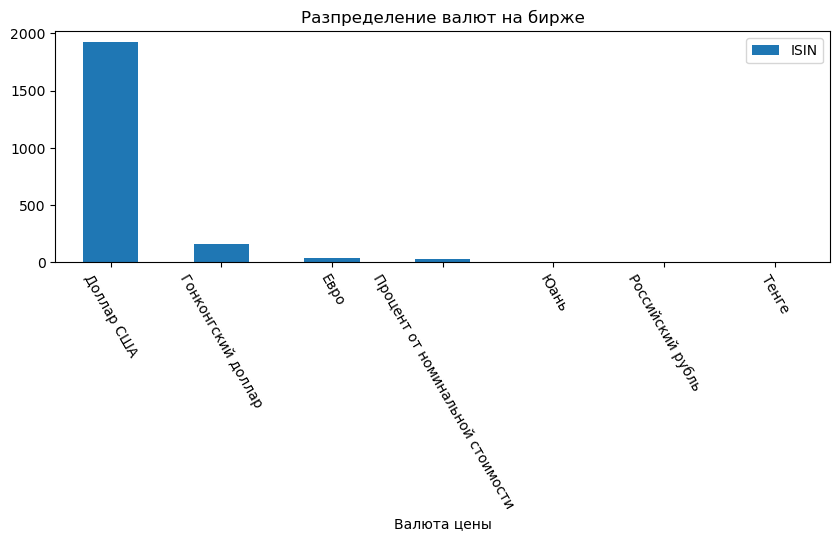

In [48]:
df2.plot(kind='bar', figsize=(10, 3))
plt.xticks(rotation=-60)
plt.title('Разпределение валют на бирже')
plt.show()

**Вывод:**
Наиболее распространенной валютой для цен является доллар США, за которым следует гонконгский доллар и евро.

In [49]:
df3 = df.pivot_table(index='Год', values='ISIN', aggfunc='count')
df3

,ISIN
Год,
2014,40
2015,5
2016,137
2017,261
2018,20
2019,565
2020,290
2021,224
2022,413


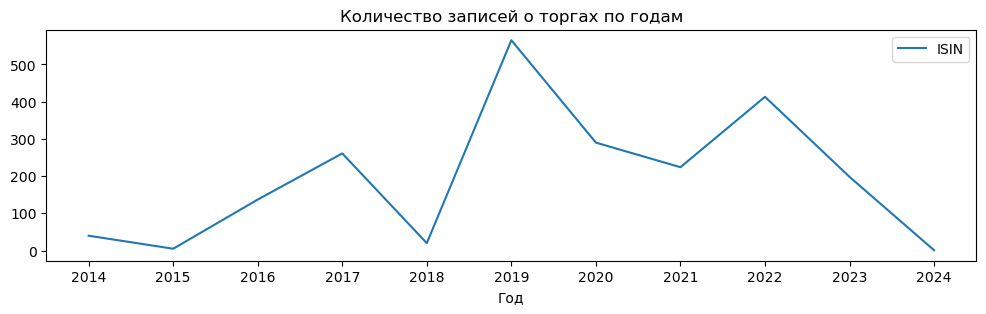

In [50]:
df3.plot(figsize=(12, 3))
plt.title('Количество записей о торгах по годам')
plt.xticks(df3.index)

plt.show()

**Вывод:**
1.   Наблюдается общий тренд на увеличение количества записей о торгах с течением времени с небольшими колебаниями в определенные годы.
2.   В 2019 и 2022 годах отмечается пик активности, с наибольшим количеством записей за весь период, что может указывать на периоды повышенной активности на рынке или особых событий.

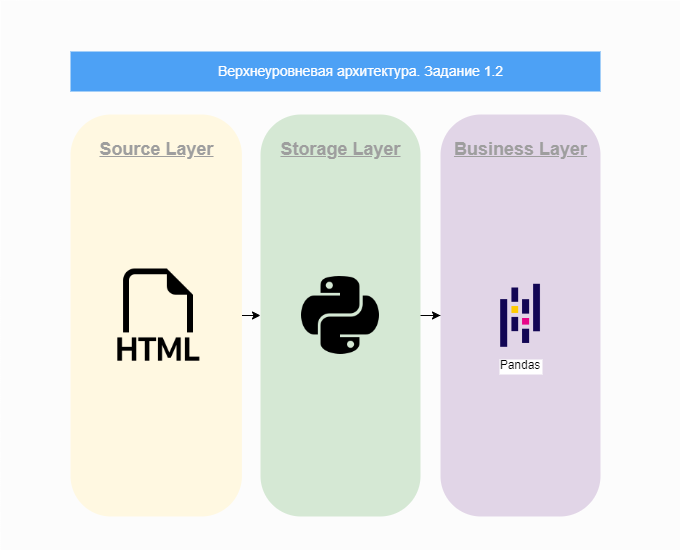

In [51]:
Image(filename=r'C:\Users\marin\Downloads\Задание 1.2.drawio.png')

## Задание 1.3. Выполнить парсинг коллекции данных на Портале открытых данных Правительства Москвы

[Источник данных - Перечень олимпиад школьников](https://data.mos.ru/opendata/2001?pageSize=10&pageIndex=0&version=2&release=22)

In [52]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint
from bs4 import BeautifulSoup as bso

# Для выполнения операций с регулярными выражениями
import re

In [53]:
import requests

url = 'https://apidata.mos.ru/v1/datasets/2001/features?api_key=9c9e90a8-59a7-4b5b-8da3-e9add478332e'
headers = {'Accept': 'application/json'}

response = requests.get(url, headers=headers)

In [54]:
print(f"URL: \n\t {response.url}")

URL: 
	 https://apidata.mos.ru/v1/datasets/2001/features?api_key=9c9e90a8-59a7-4b5b-8da3-e9add478332e


In [55]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 application/json


In [56]:
if response.status_code == 200:
    json_data = response.json()  # Преобразуем JSON-ответ в словарь Python

    features = json_data['features']

    # Создаем датафрейм из полученных данных
    df = pd.json_normalize(features)
else:
    print('Запрос вернул статус:', response.status_code)

In [57]:
df

,geometry,type,properties.datasetId,properties.attributes.is_deleted,properties.attributes.ID,properties.attributes.OlympiadName,properties.attributes.OlympiadProfile,properties.attributes.OlympiadType,properties.attributes.Class,properties.attributes.Stage,properties.attributes.OlympiadDate,properties.attributes.SchoolYear,properties.attributes.WebSite,properties.attributes.global_id,properties.rowId,properties.versionNumber,properties.releaseNumber
0,None,Feature,2001,0,43,Всероссийская олимпиада школьников по технологии,Технология,Всероссийская олимпиада,7 - 11,2.0,05.12.2015,2015,"[{'is_deleted': 0, 'WebSite': 'vos.olimpiada.r...",39706536,None,2,22
1,None,Feature,2001,0,44,Всероссийская олимпиада школьников по технологии,Технология,Всероссийская олимпиада,9 - 11,3.0,01.02.2016-02.02.2016,2016,"[{'is_deleted': 0, 'WebSite': 'vos.olimpiada.r...",39706537,None,2,22
2,None,Feature,2001,0,45,Математический праздник,Математика,Московская олимпиада,6 - 7,NaN,21.02.2016,2016,"[{'is_deleted': 0, 'WebSite': 'olympiads.mccme...",39706538,None,2,22
3,None,Feature,2001,0,46,Московская олимпиада школьников по астрономии,Астрономия,Московская олимпиада,5 - 11,NaN,06.02.2016,2016,"[{'is_deleted': 0, 'WebSite': 'astroolymp.ru/'...",39706540,None,2,22
4,None,Feature,2001,0,47,Московская олимпиада школьников по астрономии,Астрономия,Московская олимпиада,5 - 11,NaN,09.12.2015-18.01.2016,2016,"[{'is_deleted': 0, 'WebSite': 'astroolymp.ru/'...",39706541,None,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,None,Feature,2001,0,1067,Всероссийская олимпиада школьников по общество...,Обществознание,Всероссийская олимпиада,7 - 11,2.0,29.10.2022,2022,"[{'is_deleted': 0, 'WebSite': 'vos.olimpiada.r...",2390260878,None,2,22
996,None,Feature,2001,0,1068,Всероссийская олимпиада школьников по экологии,Экология,Всероссийская олимпиада,7 - 11,2.0,07.11.2022,2022,"[{'is_deleted': 0, 'WebSite': 'vos.olimpiada.r...",2390260879,None,2,22
997,None,Feature,2001,0,1069,Всероссийская олимпиада школьников по технологии,Технология,Всероссийская олимпиада,7 - 11,2.0,08.11.2022,2022,"[{'is_deleted': 0, 'WebSite': 'vos.olimpiada.r...",2390260881,None,2,22
998,None,Feature,2001,0,1070,Всероссийская олимпиада школьников по французс...,Иностранный язык (французский язык),Всероссийская олимпиада,7 - 11,2.0,09.11.2022,2022,"[{'is_deleted': 0, 'WebSite': 'vos.olimpiada.r...",2390260882,None,2,22


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   geometry                               0 non-null      object 
 1   type                                   1000 non-null   object 
 2   properties.datasetId                   1000 non-null   int64  
 3   properties.attributes.is_deleted       1000 non-null   int64  
 4   properties.attributes.ID               1000 non-null   int64  
 5   properties.attributes.OlympiadName     1000 non-null   object 
 6   properties.attributes.OlympiadProfile  1000 non-null   object 
 7   properties.attributes.OlympiadType     1000 non-null   object 
 8   properties.attributes.Class            1000 non-null   object 
 9   properties.attributes.Stage            744 non-null    float64
 10  properties.attributes.OlympiadDate     1000 non-null   object 
 11  prope

In [59]:
df = df.drop(columns=df.columns[:4])
df = df.iloc[:, :-5]

In [60]:
df.rename(columns=lambda x: x.replace('properties.attributes.', ''), inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1000 non-null   int64  
 1   OlympiadName     1000 non-null   object 
 2   OlympiadProfile  1000 non-null   object 
 3   OlympiadType     1000 non-null   object 
 4   Class            1000 non-null   object 
 5   Stage            744 non-null    float64
 6   OlympiadDate     1000 non-null   object 
 7   SchoolYear       1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [62]:
df.head(3)

,ID,OlympiadName,OlympiadProfile,OlympiadType,Class,Stage,OlympiadDate,SchoolYear
0,43,Всероссийская олимпиада школьников по технологии,Технология,Всероссийская олимпиада,7 - 11,2.0,05.12.2015,2015
1,44,Всероссийская олимпиада школьников по технологии,Технология,Всероссийская олимпиада,9 - 11,3.0,01.02.2016-02.02.2016,2016
2,45,Математический праздник,Математика,Московская олимпиада,6 - 7,NaN,21.02.2016,2016


In [63]:
df1 = df.pivot_table(index='OlympiadProfile', values='ID', aggfunc='count').sort_values(by='ID', ascending=False).head()
df1

,ID
OlympiadProfile,
Предпрофессиональная олимпиада,72
Физика,58
Математика,51
Астрономия,49
Биология,41


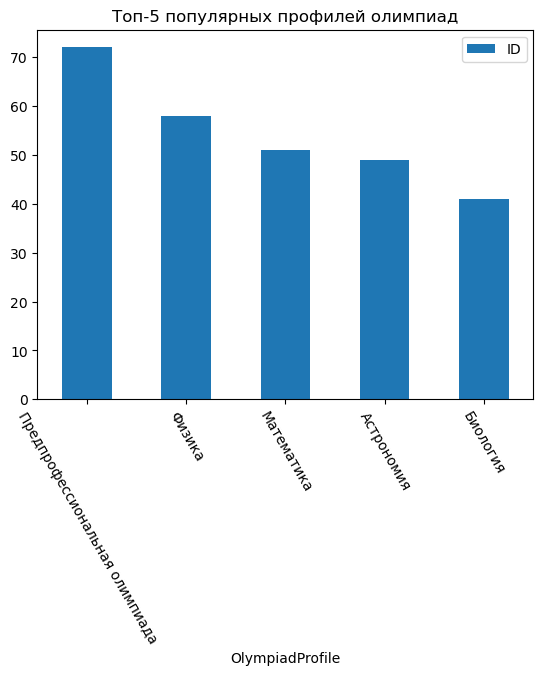

In [64]:
df1.plot(kind='bar')
plt.xticks(rotation=-60)
plt.title('Топ-5 популярных профилей олимпиад')
plt.show()

In [65]:
df2 = df.pivot_table(index='Class', values='ID', aggfunc='count').sort_values(by='ID', ascending=False).head()
df2

,ID
Class,
7 - 11,280
5 - 11,213
9 - 11,178
8 - 11,149
5 - 6,55


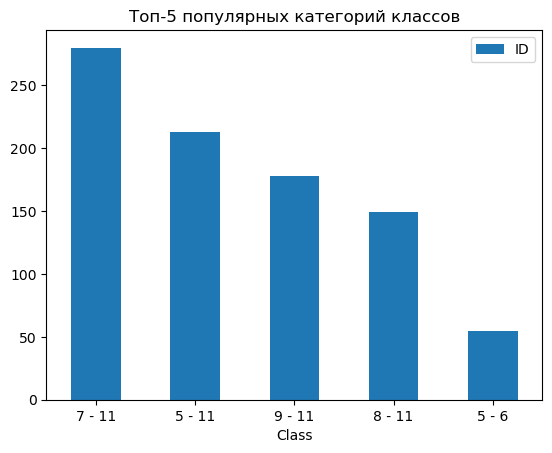

In [66]:
df2.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Топ-5 популярных категорий классов')
plt.show()

In [67]:
df3 = df.pivot_table(index='OlympiadType', values='ID', aggfunc='count').sort_values(by='ID', ascending=False)
df3

,ID
OlympiadType,
Всероссийская олимпиада,577
Московская олимпиада,414
Олимпиада «Музеи Парки Усадьбы»,9


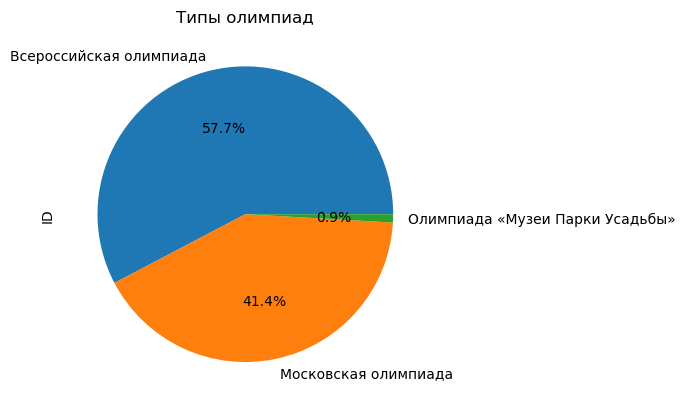

In [68]:
df3.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%')
plt.title('Типы олимпиад')
plt.show()

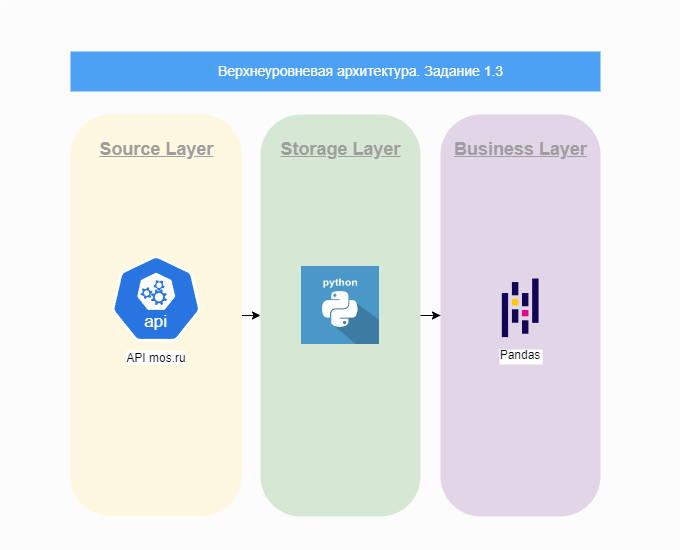

In [69]:
Image(filename=r'C:\Users\marin\Downloads\Задание 1.3.drawio.png')